# Часть №1

## Исходные данные для задачи про экзамен<a class="anchor" id="example"></a><center>

__Задача:__ предсказание баллов ученика по 100-бальной системе в зависимости от кол-ва лет стажа его репетитора

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [3]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [36]:
X.shape

(10, 2)

In [37]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

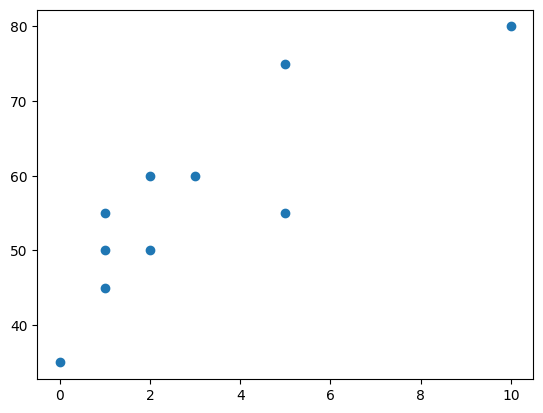

In [38]:
plt.scatter(X[:, 1], y);

In [39]:
def calc_mse(y_pred, y):
    return (np.sum((y_pred - y)**2)) / len(y)

## Подберите скорость обучения (eta) и количество итераций

Если взять ETA 0.06 или выше, будут огромные числа в W. Если взять ETA очень 0.04 или ниже, то будут, во-первых, огромные числа в Err, а, во-вторых, некрасивый график одним полем ниже. Навскидку, между 0.045 и 0.055 график выглядит лучше в 0.055, а дальше уже погрешность не стоит уточнений.

In [97]:
n = X.shape[0]

# шаг градиентного спуска
eta = 0.055

# максимальное число итераций
n_iter = 100

# список значений ошибок после каждой итерации
errors = []

W = np.array([1.0, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

# список векторов весов после каждой итерации
w_list = [W.copy()]

# вычисление весов линейной регрессии с использованием метода наименьших квадратов
w_true = np.linalg.inv(X.T @ X) @ X.T @ y

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)

    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))

    errors.append(err)
    w_list.append(W.copy())

    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

w_list = np.array(w_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
w_true



Number of objects = 10        
Learning rate = 0.055        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.94  21.235], MSE = 3047.75
Iteration #10: W_new = [22.06405765 13.06063842], MSE = 848.44
Iteration #20: W_new = [31.21345509  8.7771262 ], MSE = 268.66
Iteration #30: W_new = [36.73513379  6.50786479], MSE = 109.6
Iteration #40: W_new = [40.06112387  5.29211526], MSE = 64.0
Iteration #50: W_new = [42.06149781  4.63338341], MSE = 50.33
Iteration #60: W_new = [43.26313928  4.2724736 ], MSE = 46.05
Iteration #70: W_new = [43.98427548  4.07261073], MSE = 44.67
Iteration #80: W_new = [44.41671151  3.96081125], MSE = 44.21
Iteration #90: W_new = [44.67586386  3.89768846], MSE = 44.05
В случае использования градиентного спуска функционал ошибки составляет 44.0013


array([45.0625,  3.8125])

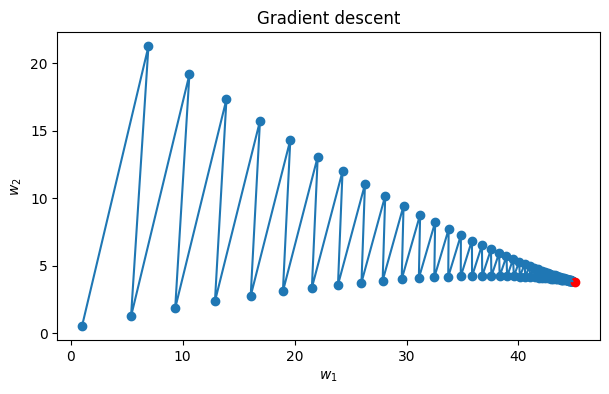

In [98]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(7, 4))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

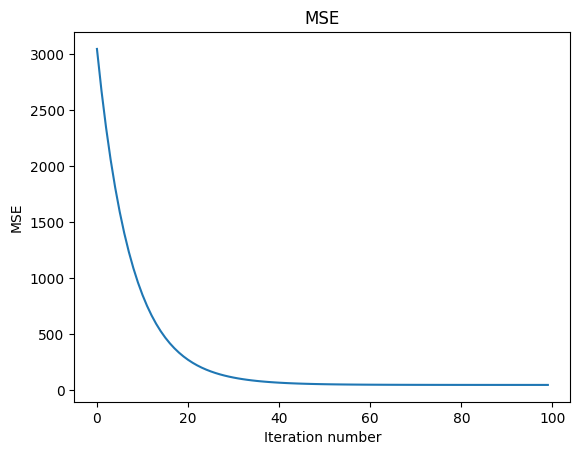

In [99]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

## В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [96]:
n = X.shape[0]

eta = 0.055
n_iter = 151

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y)) #ValueError: shapes (10,2) and (10,) not aligned: 2 (dim 1) != 10 (dim 0). Значит, X -> X.T
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

w_true

Number of objects = 10        
Learning rate = 0.055        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.94  21.235], MSE = 3047.75
Iteration #10: W_new = [22.06405765 13.06063842], MSE = 848.44
Iteration #20: W_new = [31.21345509  8.7771262 ], MSE = 268.66
Iteration #30: W_new = [36.73513379  6.50786479], MSE = 109.6
Iteration #40: W_new = [40.06112387  5.29211526], MSE = 64.0
Iteration #50: W_new = [42.06149781  4.63338341], MSE = 50.33
Iteration #60: W_new = [43.26313928  4.2724736 ], MSE = 46.05
Iteration #70: W_new = [43.98427548  4.07261073], MSE = 44.67
Iteration #80: W_new = [44.41671151  3.96081125], MSE = 44.21
Iteration #90: W_new = [44.67586386  3.89768846], MSE = 44.05
Iteration #100: W_new = [44.83109194  3.86174724], MSE = 44.0
Iteration #110: W_new = [44.92403348  3.84112851], MSE = 43.98
Iteration #120: W_new = [44.97966334  3.82922172], MSE = 43.97
Iteration #130: W_new = [45.01295168  3.82230646], MSE = 43.97
Iteration #140: W_new = [45.03286686  3.818270

array([45.0625,  3.8125])

## Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога  ϵ.

In [95]:
n = X.shape[0]

eta = 0.055
epsilon = 1e-6

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

iteration = 0
while True:
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    W_new = W - eta * (1/n * 2 * np.dot(X.T, y_pred - y))

    # если уже слишком несущественно
    if np.linalg.norm(W_new - W) < epsilon:
        print(f'Converged after {iteration} iterations: W = {W_new}, MSE = {round(err, 2)}')
        break

    W = W_new
    iteration += 1

    if iteration % 10 == 0:
        print(f'Iteration #{iteration}: W_new = {W}, MSE = {round(err, 2)}')

w_true

Number of objects = 10        
Learning rate = 0.055        
Initial weights = [1.  0.5] 

Iteration #10: W_new = [18.95229787  3.08632561], MSE = 960.06
Iteration #20: W_new = [29.56544869  3.98422498], MSE = 298.72
Iteration #30: W_new = [35.8524921   4.20783082], MSE = 118.05
Iteration #40: W_new = [39.58302733  4.19021347], MSE = 66.48
Iteration #50: W_new = [41.7996338   4.10659476], MSE = 51.09
Iteration #60: W_new = [43.11816676  4.02130042], MSE = 46.3
Iteration #70: W_new = [43.90320214  3.95325583], MSE = 44.75
Iteration #80: W_new = [44.37094803  3.90434012], MSE = 44.24
Iteration #90: W_new = [44.64981246  3.87111888], MSE = 44.06
Iteration #100: W_new = [44.81614968  3.8493372 ], MSE = 44.0
Iteration #110: W_new = [44.91540616  3.83538788], MSE = 43.98
Iteration #120: W_new = [44.97465346  3.82660073], MSE = 43.97
Iteration #130: W_new = [45.01002811  3.82113134], MSE = 43.97
Iteration #140: W_new = [45.03115365  3.81775725], MSE = 43.97
Iteration #150: W_new = [45.0437718

array([45.0625,  3.8125])

# Часть №2

## Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

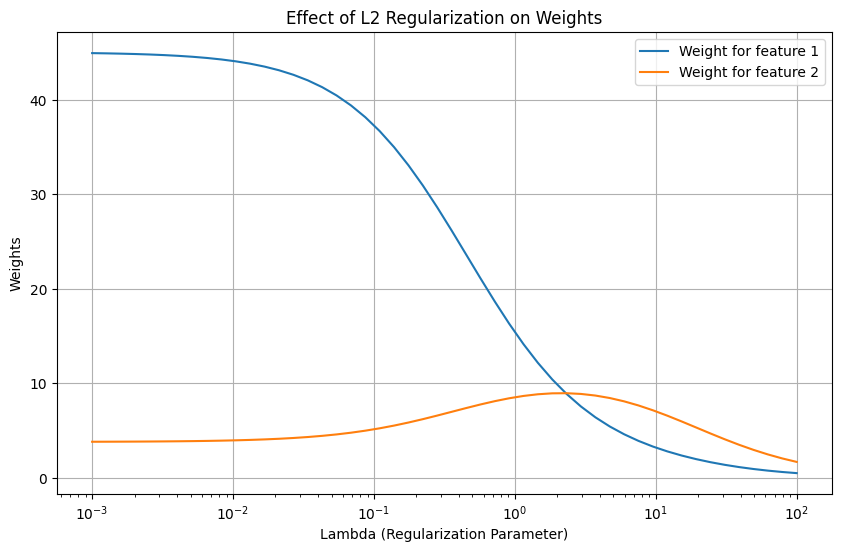

In [121]:

# Функция для обновления весов с использованием L2-регуляризации
def l2_regularized_weights(X, y, eta, lambda_reg, epsilon=1e-6, max_iter=10000):
    n = X.shape[0]  # Количество объектов
    W = np.zeros(X.shape[1])  # Инициализация весов
    iteration = 0

    while iteration < max_iter:
        y_pred = np.dot(X, W)  # Предсказание
        err = calc_mse(y_pred, y)  # Вычисление ошибки

        # Вычисление градиента с учетом L1-регуляризации
        gradient = (1/n * 2 * np.dot(X.T, y_pred - y) + 2 * lambda_reg * W) # Штрафа нет (Л2)
        W_new = W - eta * gradient

        # если уже слишком несущественно
        if np.linalg.norm(W_new - W) < epsilon:
            break

        W = W_new
        iteration += 1

    return W, err

lambda_values = np.logspace(-3, 2, 50)  # Значения параметра регуляризации (логарифмическое распр, 50 значений от 0.0001 до 100)
weights = np.zeros((len(lambda_values), X.shape[1]))

for i, lambda_reg in enumerate(lambda_values):
    W, _ = l2_regularized_weights(X, y, eta=0.001, lambda_reg=lambda_reg) # Получаем веса для текущего lambda
    weights[i] = W

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, weights[:, 0], label='Weight for feature 1')
plt.plot(lambda_values, weights[:, 1], label='Weight for feature 2')
plt.xscale('log')
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Weights')
plt.title('Effect of L2 Regularization on Weights')
plt.legend()
plt.grid()
plt.show()

Мы написали функцию, которая обновляет веса с учетом регуляризации через лямбду. Это значит, что модель будет не только хорошо описывать уже данную обучающую выборку, но и адекватно, без больших весов, предсказывать новые данные, а то они будут обрабатываться плохо.

## Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

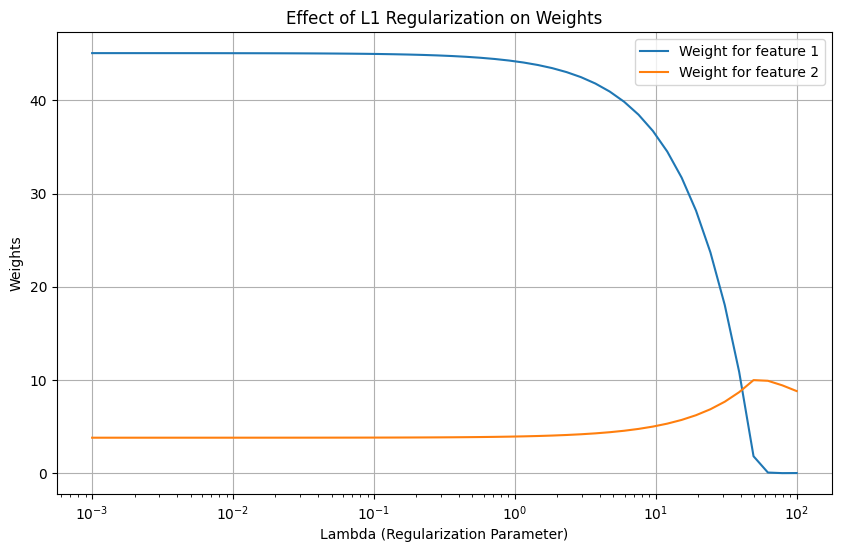

In [122]:

# Функция для обновления весов с использованием L1-регуляризации
def l1_regularized_weights(X, y, eta, lambda_reg, epsilon=1e-6, max_iter=10000):
    n = X.shape[0]  # Количество объектов
    W = np.zeros(X.shape[1])  # Инициализация весов
    iteration = 0

    while iteration < max_iter:
        y_pred = np.dot(X, W)  # Предсказание
        err = calc_mse(y_pred, y)  # Вычисление ошибки

        # Вычисление градиента с учетом L1-регуляризации
        gradient = (1/n * 2 * np.dot(X.T, y_pred - y) + lambda_reg * np.sign(W)) # Штраф есть (Л1)
        W_new = W - eta * gradient

        # Выход, если разницы уже несущественны
        if np.linalg.norm(W_new - W) < epsilon:
            break

        W = W_new
        iteration += 1

    return W, err

lambda_values = np.logspace(-3, 2, 50)  # Значения параметра регуляризации (логарифмическое распр, 50 значений от 0.0001 до 100)
weights = np.zeros((len(lambda_values), X.shape[1]))

for i, lambda_reg in enumerate(lambda_values):
    W, _ = l1_regularized_weights(X, y, eta=0.001, lambda_reg=lambda_reg) # Получаем веса для текущего lambda
    weights[i] = W

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, weights[:, 0], label='Weight for feature 1')
plt.plot(lambda_values, weights[:, 1], label='Weight for feature 2')
plt.xscale('log')
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Weights')
plt.title('Effect of L1 Regularization on Weights')
plt.legend()
plt.grid()
plt.show()

## Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию

Можно, но не нужно, потому что это бессмысленно, это один и тот же этап для разных случаев. Если у нас переменные имеют гауссово распределение (колокол), тогда есть смысл применить стандартизацию. Если же переменные у нас нужно масштабировать, то есть смысл нормализации. Смысла в обоих сразу никогда нет, более того, стандартизация «сильнее» нормализации и она просто сработает на нормализованных значениях, как на обычных (ведь, по сути, они просто были пропорционально уменьшены).

Исходные данные:  [10 20 30 40 50]
Нормализованные данные:  [0.   0.25 0.5  0.75 1.  ]
Стандартизированные данные после нормализации:  [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
Стандартизированные данные:  [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


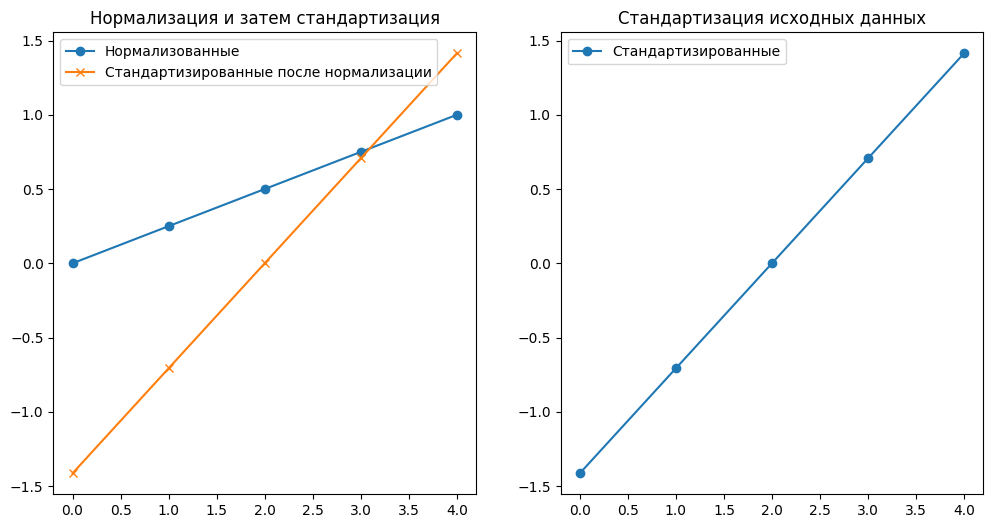

In [124]:
# Пример
data = np.array([10, 20, 30, 40, 50])

def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def standardize(data):
    return (data - np.mean(data)) / np.std(data)

normalized_data = normalize(data)

standardized_after_normalization = standardize(normalized_data)

standardized_data = standardize(data)

print("Исходные данные: ", data)
print("Нормализованные данные: ", normalized_data)
print("Стандартизированные данные после нормализации: ", standardized_after_normalization)
print("Стандартизированные данные: ", standardized_data)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Нормализация и затем стандартизация")
plt.plot(normalized_data, label='Нормализованные', marker='o')
plt.plot(standardized_after_normalization, label='Стандартизированные после нормализации', marker='x')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Стандартизация исходных данных")
plt.plot(standardized_data, label='Стандартизированные', marker='o')
plt.legend()

plt.show()

## Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов

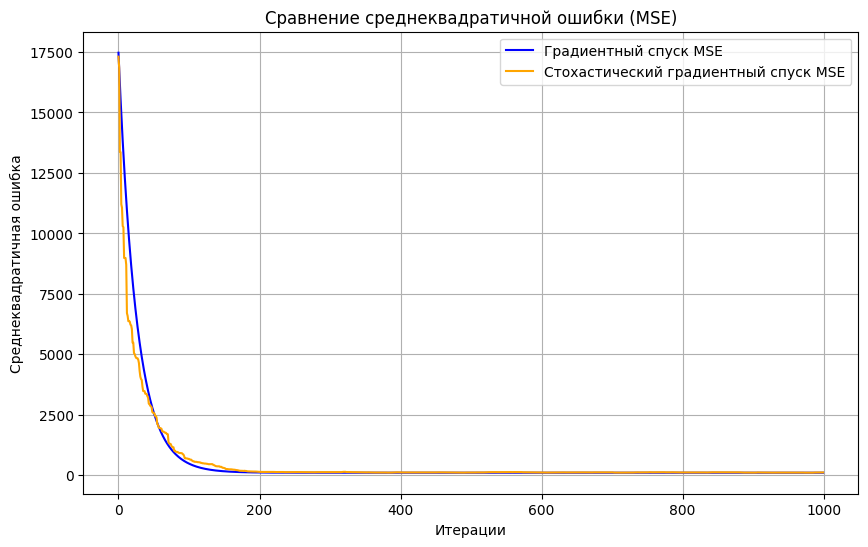

(92.87528021401741, 105.48493734590502)

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Создаем набор данных с 1000 примерами и 10 признаками
X, y, coef = make_regression(n_samples=1000, n_features=10, noise=10, coef=True, random_state=42)

# Добавляем столбец единиц для свободного члена (bias) в матрицу признаков
X_b = np.c_[np.ones((X.shape[0], 1)), X]

def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    W = np.zeros(n)  # Инициализация весов нулями
    mse_history = []

    # Итерационный процесс
    for _ in range(n_iterations):
        y_pred = X.dot(W)  # Предсказание на текущих весах
        gradient = (2/m) * X.T.dot(y_pred - y)
        W -= learning_rate * gradient # Обновление весов
        mse = mean_squared_error(y, y_pred)
        mse_history.append(mse)

    return mse_history, W  # Возвращаем историю MSE и финальные веса

def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    W = np.zeros(n)  # Инициализация весов нулями
    mse_history = []

    # Итерационный процесс
    for _ in range(n_iterations):
        train_ind = np.random.randint(m)  # Генерация случайного индекса для выбора примера
        y_pred = X[train_ind].dot(W)  # Предсказание для одного примера

        gradient = 2 * (y_pred - y[train_ind]) * X[train_ind]
        W -= learning_rate * gradient  # Обновление весов

        mse = mean_squared_error(y, X.dot(W))
        mse_history.append(mse)

    return mse_history, W

mse_gd, W_gd = gradient_descent(X_b, y, learning_rate=0.01, n_iterations=1000)
mse_sgd, W_sgd = stochastic_gradient_descent(X_b, y, learning_rate=0.01, n_iterations=1000)

plt.figure(figsize=(10, 6))
plt.plot(mse_gd, label='Градиентный спуск MSE', color='blue')
plt.plot(mse_sgd, label='Стохастический градиентный спуск MSE', color='orange')
plt.title('Сравнение среднеквадратичной ошибки (MSE)')
plt.xlabel('Итерации')
plt.ylabel('Среднеквадратичная ошибка')
plt.legend()
plt.grid()
plt.show()

final_mse_gd = mse_gd[-1]  # Последнее значение MSE для градиентного спуска
final_mse_sgd = mse_sgd[-1]  # Последнее значение MSE для стохастического градиентного спуска

final_mse_gd, final_mse_sgd